In [1]:
#Se importan las librerias necesarias
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Se leen los datos
Datos = pd.read_csv('C:/Users/alvar/Documents/Maestria en Ciencia de datos/Aprendizaje automatico/Tareas/PIA/train.csv')

In [3]:
#Se elimina la columna de ID ya que no es relevante para los modelos
Datos = Datos.drop(['id'], axis = 1, inplace = False)

#Se separa el conjunto en variables de entrada (X) y variable de salida o repuesta (Y):
datos_x = Datos.drop(['engagement'], axis = 1, inplace = False)
datos_y = Datos['engagement']

In [4]:
#Se crean los modelos y sus posibles parametros:
arbol = DecisionTreeClassifier()
arbol_param = [{'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': list(range(1,60)), 'random_state': [0]}]

kvecinos = KNeighborsClassifier()
kvecinos_param = [{'n_neighbors': list(range(1,10)), 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute']}]

reglog = LogisticRegression()
reglog_param = [{'penalty': ['l1', 'l2'], 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}]

bosque = ExtraTreesClassifier()
bosque_param = [{'n_estimators': list(range(20,120,20)), 'max_depth': list(range(1,30)), 'random_state': [0]}]

grad = GradientBoostingClassifier()
grad_param = [{'loss': ['log_loss', 'exponential'], 'n_estimators': list(range(10,110,10)), 'criterion': ['friedman_mse', 'squared_error'], 'random_state': [0]}]

In [5]:
#Se generan los mejores modelos:
mejor_arbol = GridSearchCV(arbol, arbol_param, cv=5, scoring='roc_auc')
mejor_arbol.fit(datos_x, datos_y)
print('El mejor modelo para arbol de desición:')
print(mejor_arbol.best_params_)
print(mejor_arbol.best_score_)
print('---------------------------------------------------------------------------------------------------')



El mejor modelo para arbol de desición:
{'criterion': 'entropy', 'max_depth': 4, 'random_state': 0}
0.8475329559059064
---------------------------------------------------------------------------------------------------


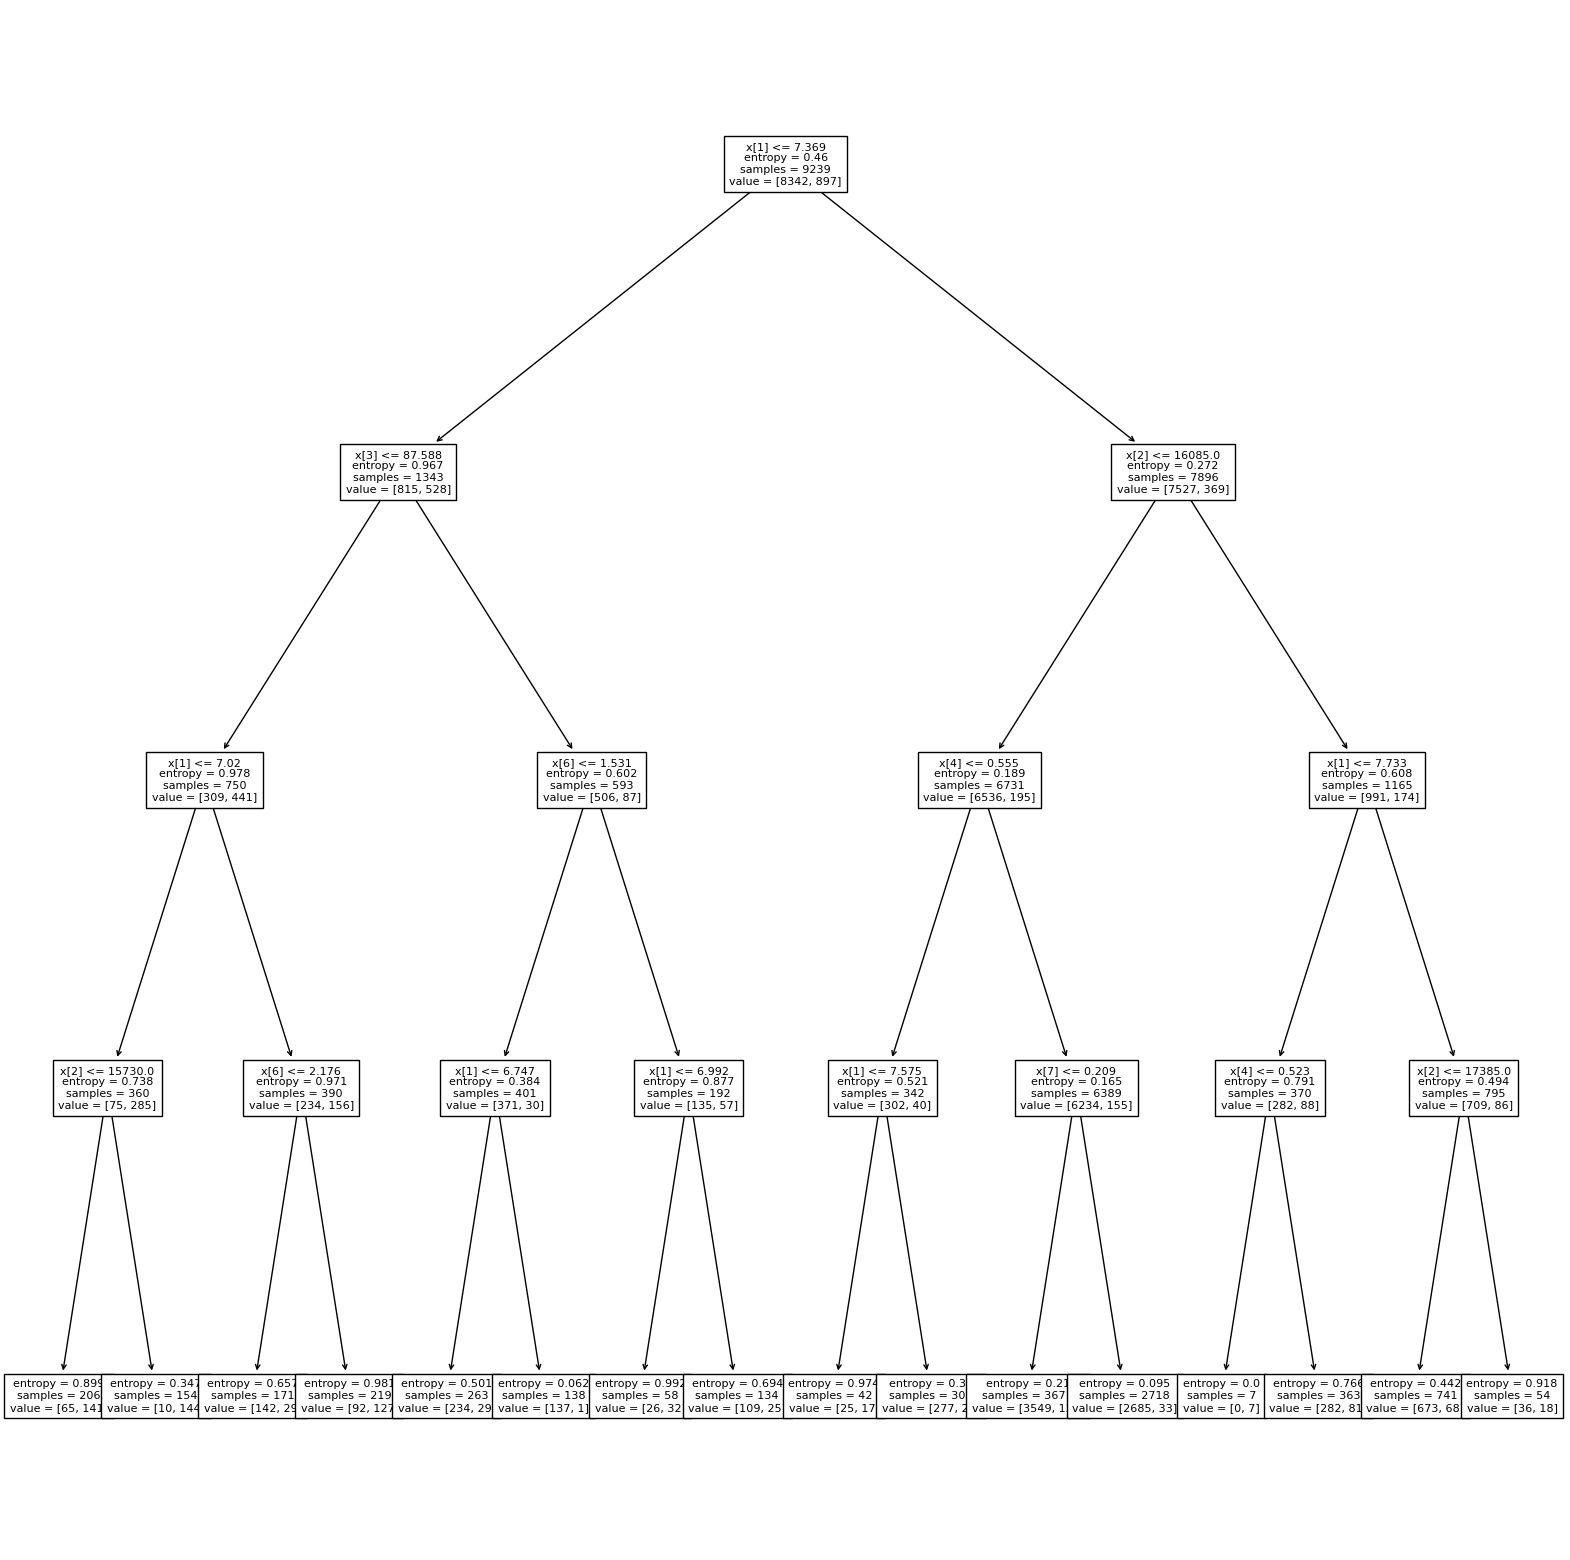

In [6]:
#Se muestra el arbol generado:
plt.figure(figsize=(20, 20))
tree.plot_tree(mejor_arbol.best_estimator_, fontsize=8)
plt.show()

In [7]:
#Se generan los mejores modelos:
scaler = StandardScaler()
scaler.fit(datos_x)
datos_x_scale = scaler.transform(datos_x)
mejor_kvecinos = GridSearchCV(kvecinos, kvecinos_param, cv=5, scoring='roc_auc')
mejor_kvecinos.fit(datos_x_scale, datos_y)
print('El mejor modelo para kvecinos cercanos:')
print(mejor_kvecinos.best_params_)
print(mejor_kvecinos.best_score_)
print('---------------------------------------------------------------------------------------------------')

El mejor modelo para kvecinos cercanos:
{'algorithm': 'ball_tree', 'n_neighbors': 9, 'weights': 'distance'}
0.8262453225169306
---------------------------------------------------------------------------------------------------


In [8]:
#Se generan los mejores modelos:
mejor_reglog = GridSearchCV(reglog, reglog_param, cv=5, scoring='roc_auc')
mejor_reglog.fit(datos_x_scale, datos_y)
print('El mejor modelo para regresion logistica:')
print(mejor_reglog.best_params_)
print(mejor_reglog.best_score_)
print('---------------------------------------------------------------------------------------------------')

El mejor modelo para regresion logistica:
{'penalty': 'l2', 'solver': 'liblinear'}
0.8462562615549963
---------------------------------------------------------------------------------------------------


c:\Users\alvar\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\alvar\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\alvar\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\alvar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _c

In [11]:
#Se generan los mejores modelos:
mejor_bosque = GridSearchCV(bosque, bosque_param, cv=5, scoring='roc_auc')
mejor_bosque.fit(datos_x, datos_y)
print('El mejor modelo para random forest:')
print(mejor_bosque.best_params_)
print(mejor_bosque.best_score_)
print('---------------------------------------------------------------------------------------------------')

El mejor modelo para random forest:
{'max_depth': 24, 'n_estimators': 100, 'random_state': 0}
0.8954296164765475
---------------------------------------------------------------------------------------------------


In [12]:
#Se generan los mejores modelos:
mejor_grad = GridSearchCV(grad, grad_param, cv=5, scoring='roc_auc')
mejor_grad.fit(datos_x, datos_y)
print('El mejor modelo para gradient boost:')
print(mejor_grad.best_params_)
print(mejor_grad.best_score_)
print('---------------------------------------------------------------------------------------------------')

El mejor modelo para gradient boost:
{'criterion': 'squared_error', 'loss': 'exponential', 'n_estimators': 100, 'random_state': 0}
0.8884233896894923
---------------------------------------------------------------------------------------------------
